The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](resources/Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

**In this project, you'll get a chance to explore and answer several questions related to this prizewinning data:**
1. What is the most commonly awarded sex and birth country?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [30]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import data
nobel = pd.read_csv('data/nobel.csv')

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# What is the most commonly awarded sex and birth country?

In [31]:
top_sex = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]

print("The most commonly awarded sex and birth country were", top_sex, "and", top_country)

The most commonly awarded sex and birth country were Male and United States of America


These results probably aren't surprising to most, but we can visualize just how skewed the results are.

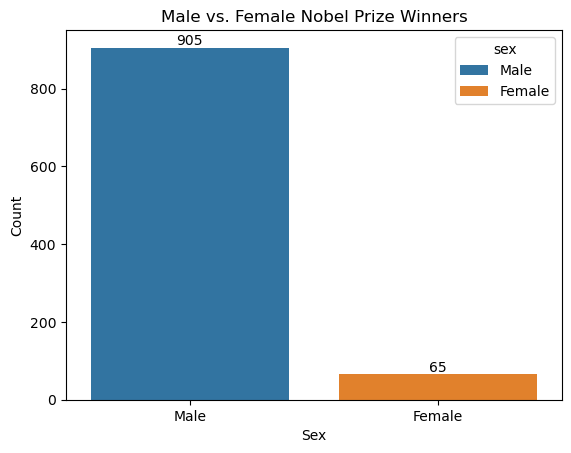

In [32]:
g1 = sns.countplot(x='sex',
                data=nobel,
                hue='sex')
g1.set(title='Male vs. Female Nobel Prize Winners',
     xlabel='Sex',
     ylabel='Count')
for container in g1.containers:
    g1.bar_label(container)

plt.show()

We can see that there are nearly 14 times as many male winners as female winners and the US has over 3 times as many winners as the next highest laureate count.

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [34]:
# Create a US born winners column
nobel['usa_winner'] = nobel['birth_country'] == 'United States of America'

# Create a new decade column using an integer divide
nobel['decade_start'] = nobel['year'] // 10 * 10

# Find the ratio
usa_win_ratio = nobel.groupby('decade_start', as_index=False)['usa_winner'].mean()

# Find the max
max_decade_usa = usa_win_ratio.loc[usa_win_ratio['usa_winner'] == usa_win_ratio['usa_winner'].max()]['decade_start'].values[0]

print("The decade with the highest ratio of US-born laureates was", max_decade_usa)

The decade with the highest ratio of US-born laureates was 2000


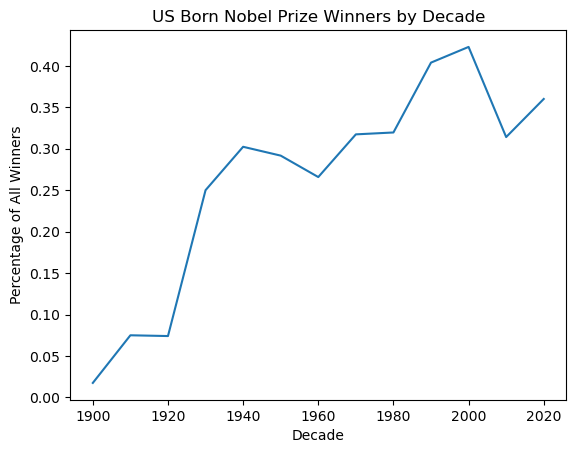

In [35]:
g3 = sns.lineplot(x='decade_start',
                  y='usa_winner',
                  data=nobel,
                  errorbar=None
                 )
g3.set(title='US Born Nobel Prize Winners by Decade',
       xlabel='Decade',
       ylabel='Percentage of All Winners'
      )

plt.show()

We can see that there was a sharp increase in American winners in the 1930s. We can speculate that this may be due to the fact that the "Roaring 20s" saw the US become a global economic power as well as more than double its wealth. Such rapid economic growth would likely trickle into other areas like math, science, and literature over the next decade.

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [36]:
# Create a new decade column using an integer divide
nobel['decade_start'] = nobel['year'] // 10 * 10

# Create an 'is_female' column
nobel['is_female'] = nobel['sex'] == 'Female'

# Find the ratio
female_win_ratio = nobel.groupby(['decade_start', 'category'], as_index=False)['is_female'].mean()

# Find the max
max_female_win = female_win_ratio.loc[female_win_ratio['is_female'] == female_win_ratio['is_female'].max(), ['decade_start', 'category']].values[0]

# Store in a dictionary
max_female_dict = {max_female_win[0]:max_female_win[1]}

female_win_ratio_2020_lit = int(female_win_ratio[(female_win_ratio['category'] == 'Literature') & (female_win_ratio['decade_start'] == 2020)].iloc[0].loc['is_female'] * 100)

print("The decade and category combination with the highest proportion of female laureates was", max_female_dict)
print("Women in the 2020s won", female_win_ratio_2020_lit, "percent of the Nobel Prizes in Literature")

The decade and category combination with the highest proportion of female laureates was {2020: 'Literature'}
Women in the 2020s won 50 percent of the Nobel Prizes in Literature


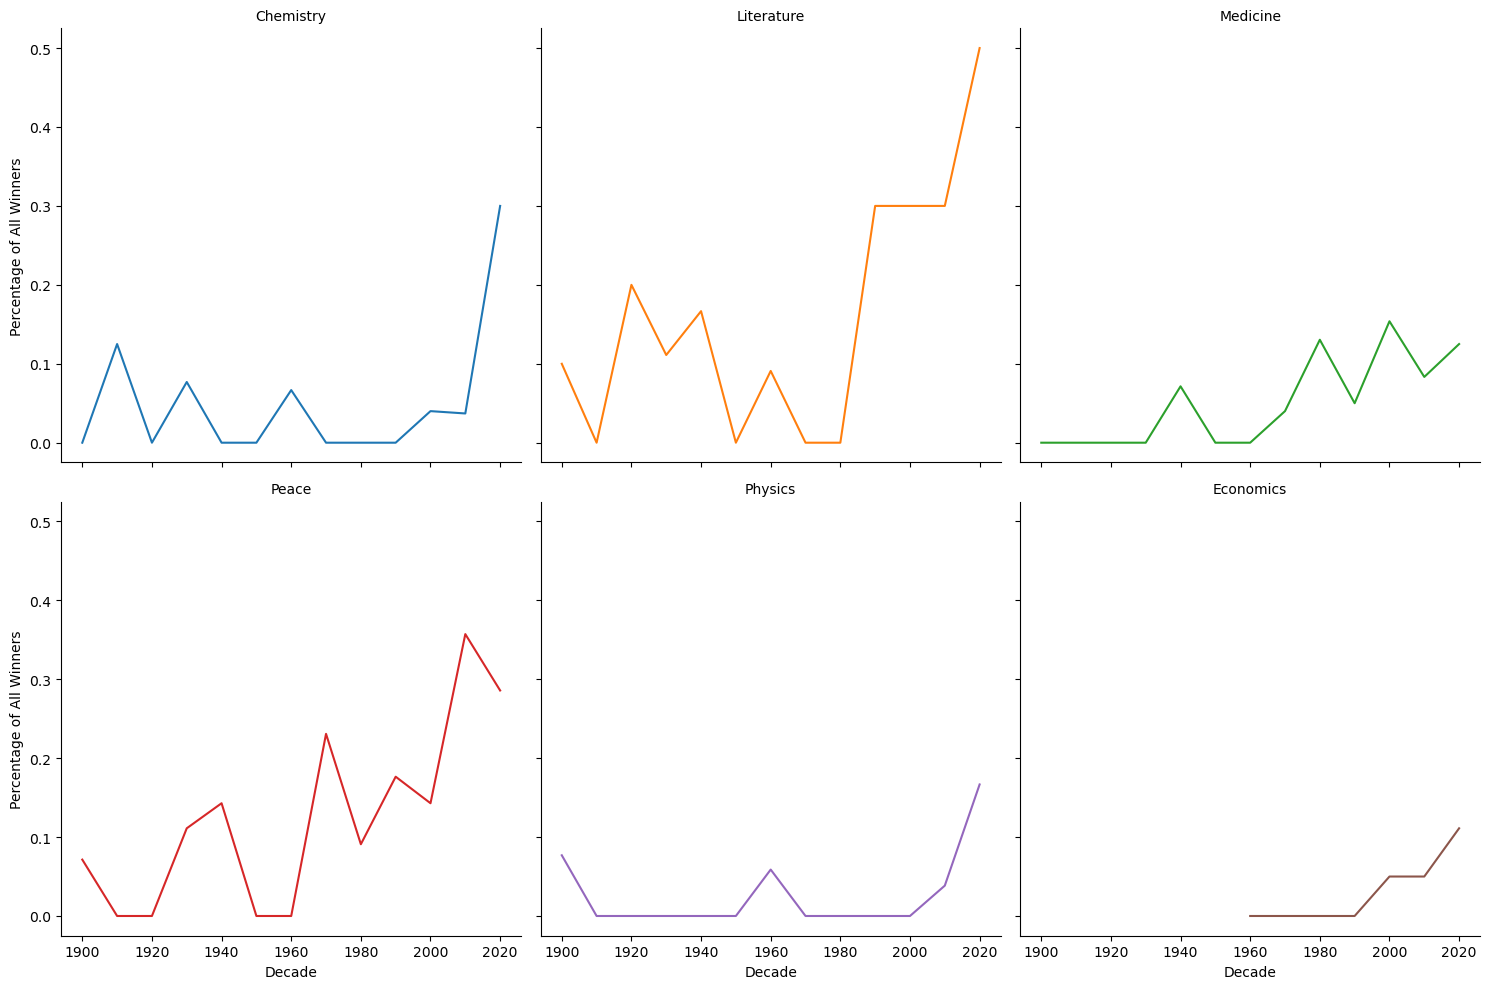

In [37]:
g4 = sns.relplot(x='decade_start',
                 y='is_female',
                 col='category',
                 col_wrap=3,
                 data=nobel,
                 kind='line',
                 hue='category',
                 errorbar=None,
                 legend=None
                )
g4.set_titles('{col_name}')
g4.set(xlabel='Decade',
      ylabel='Percentage of All Winners')
plt.show()

Women's 50% ratio in 2020s Literature is astounding when considering they've only won 6.7% of all Nobel Prizes. We can see that all categories show an upward trend in female winners, with the largest spikes happening in the 21st century. I suspect that that trend will continue until the ratios are closer to even.

# Who was the first woman to receive a Nobel Prize, and in what category?

In [38]:
first_female = nobel.sort_values('year').loc[nobel['is_female'] == True].reset_index().iloc[0]

first_woman_name, first_woman_category, first_woman_year, first_woman_motivation = first_female.loc[['full_name', 'category', 'year', 'motivation']]

print("The first woman to win a Nobel Prize was", first_woman_name, "in", first_woman_category, "specifically,", first_woman_motivation)

The first woman to win a Nobel Prize was Marie Curie, née Sklodowska in Physics specifically, "in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"


# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [41]:
repeat_list = nobel['full_name'].value_counts()[nobel['full_name'].value_counts() > 1].index.tolist()

print("The following individuals and organizations have won more than one Nobel Prize:", ', '.join(repeat_list))

The following individuals and organizations have won more than one Nobel Prize: Comité international de la Croix Rouge (International Committee of the Red Cross), Linus Carl Pauling, John Bardeen, Frederick Sanger, Marie Curie, née Sklodowska, Office of the United Nations High Commissioner for Refugees (UNHCR)


# Exploratory Data Analysis

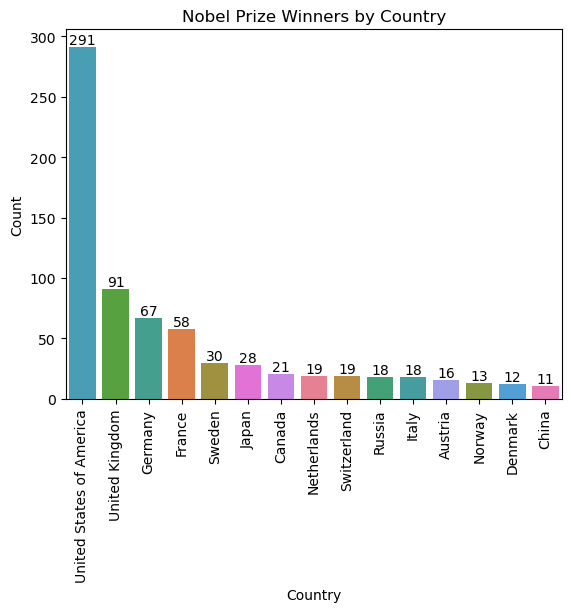

In [42]:
nobel_over_10 = nobel[nobel['birth_country'].map(nobel['birth_country'].value_counts()) > 10]

g2 = sns.countplot(x='birth_country',
                   data=nobel_over_10,
                   dodge=False,
                   hue='birth_country',
                   order=nobel_over_10['birth_country'].value_counts().index
                  )
g2.set(title='Nobel Prize Winners by Country',
       xlabel='Country',
       ylabel='Count')
for container in g2.containers:
    g2.bar_label(container)
plt.xticks(rotation=90)

plt.show()